In [1]:
!nvidia-smi

Sun Oct  4 07:32:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     8W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
# import necessary libraries 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Dataset/train'
valid_path = '/content/drive/My Drive/Dataset/test'

In [5]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of it

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Dataset/train/*')

In [8]:
folders

['/content/drive/My Drive/Dataset/train/fresh cotton plant',
 '/content/drive/My Drive/Dataset/train/fresh cotton leaf',
 '/content/drive/My Drive/Dataset/train/diseased cotton leaf',
 '/content/drive/My Drive/Dataset/train/diseased cotton plant']

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:


test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [17]:
final_model = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
61/61 [==============================] - 657s 11s/step - loss: 1.2749 - accuracy: 0.7899 - val_loss: 0.2679 - val_accuracy: 0.8889
Epoch 2/15
61/61 [==============================] - 38s 620ms/step - loss: 0.6051 - accuracy: 0.8898 - val_loss: 0.4552 - val_accuracy: 0.8333
Epoch 3/15
61/61 [==============================] - 38s 624ms/step - loss: 0.6574 - accuracy: 0.8980 - val_loss: 0.2308 - val_accuracy: 0.8889
Epoch 4/15
61/61 [==============================] - 38s 619ms/step - loss: 0.5851 - accuracy: 0.9052 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 5/15
61/61 [==============================] - 38s 619ms/step - loss: 0.5692 - accuracy: 0.9211 - val_loss: 5.4834e-04 - val_accuracy: 1.0000
Epoch 6/15
61/61 [==============================] - 38s 617ms/step - loss: 0.5785 - accuracy: 0.9241 - val_loss: 1.0129e-04 - val_accuracy: 1.0000
Epoch 7/15
61/61 [==============================] - 38s 620ms/step - loss: 0.5183 - accuracy: 0.9288 - val_loss: 0.0103 - val_accuracy:

In [19]:
import matplotlib.pyplot as plt

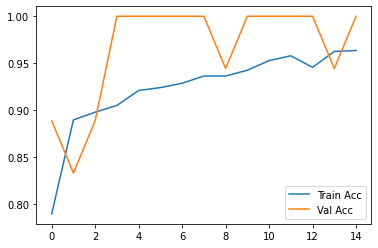

In [20]:
# plot the accuracy
plt.plot(final_model.history['accuracy'], label='Train Acc')
plt.plot(final_model.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

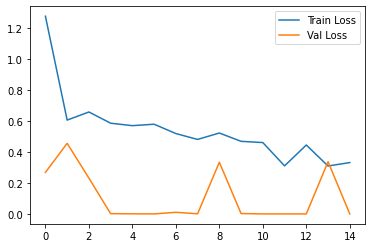

In [21]:
# plot the loss
plt.plot(final_model.history['loss'], label='Train Loss')
plt.plot(final_model.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [22]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[8.9701585e-33, 1.0000000e+00, 1.6842054e-22, 2.4127882e-15],
       [9.9980658e-01, 1.9347313e-04, 2.7713123e-18, 4.5788321e-14],
       [5.4006341e-22, 1.3701036e-04, 3.5778647e-21, 9.9986303e-01],
       [1.2988664e-26, 1.0000000e+00, 5.0017763e-18, 8.6129021e-11],
       [9.9999809e-01, 3.2496679e-22, 2.6695640e-10, 1.8738039e-06],
       [1.0000000e+00, 2.6221692e-20, 6.7086353e-17, 2.8311723e-31],
       [3.4995601e-20, 1.2929494e-18, 1.0000000e+00, 3.6062328e-18],
       [0.0000000e+00, 2.0632084e-15, 0.0000000e+00, 1.0000000e+00],
       [4.7678851e-19, 2.5233089e-38, 1.0000000e+00, 4.3852772e-29],
       [7.7483504e-33, 1.0000000e+00, 4.9983390e-27, 1.0058399e-19],
       [2.1670544e-15, 6.2247714e-23, 1.0000000e+00, 2.4742974e-22],
       [3.5604334e-16, 3.2652574e-06, 5.5015800e-14, 9.9999678e-01],
       [2.0062547e-23, 5.7038218e-19, 1.0000000e+00, 8.8470060e-25],
       [1.9185776e-31, 1.6233393e-23, 4.4309819e-29, 1.0000000e+00],
       [2.5083664e-23, 6.5291585e-

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([1, 0, 3, 1, 0, 0, 2, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 1])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_inception.h5')

In [52]:
img = image.load_img('/content/drive/My Drive/Dataset/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))

In [53]:
x = image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [54]:
x.shape

(224, 224, 3)

In [55]:
x = x/255

In [56]:
import numpy as np
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

array([[0.9228982 , 0.0132466 , 0.01109285, 0.0527624 ]], dtype=float32)

In [58]:
a = np.argmax(model.predict(img_data), axis=1)

In [59]:
a == 0

array([ True])